This notebook contains some examples of plotter and comparer usage on the data collected from Janyary to May 2016. JVM are zing dev, granada and highlander, and some version of oracle VM. Experiments were held on cperf1 and isvx01 machines.

In [1]:
import plotter
import comparer

%matplotlib inline

#### Basic plots

First of all, let's have a look how the data looks like. Almoust all runs are 10 minutes long. Notice that only the runs of same duration can be compared to each other, because the duration of the run can significantly affect percentiles values, especialy around distribution tail.

Machine: isvx01 <br />
Workload: D <br />
Throughput: 10k <br />
Request type: READ <br />

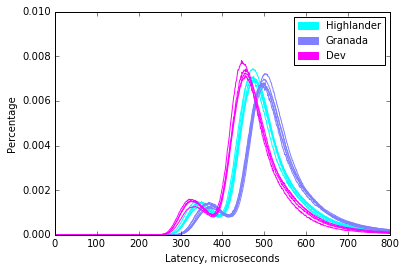

In [26]:
args = plotter.parse_args('-if ./all_data/rd/isvx01/Dev\
                               ./all_data/rd/isvx01/Highlander \
                               ./all_data/rd/isvx01/Granada\
                               -bn Dev Highlander Granada\
                                -rq READ -p -al 0 800 0 0.01')
plotter.whole_cycle(args)

Machine: isvx01 <br />
Workload: D <br />
Throughput: 10k <br />
Request type: INSERT <br />

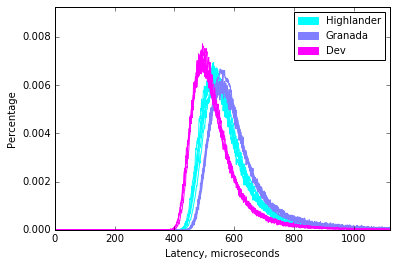

In [16]:
args = plotter.parse_args('-if ./all_data/rd/isvx01/Dev\
                               ./all_data/rd/isvx01/Highlander \
                               ./all_data/rd/isvx01/Granada\
                               -bn Dev Highlander Granada\
                                -rq INSERT -p -aa')
plotter.whole_cycle(args)

Machine: cperf1 <br />
Workload: D <br />
Throughput: 10k <br />
Request type: READ <br />

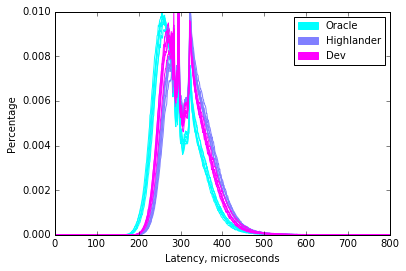

In [23]:
args = plotter.parse_args('-if ./all_data/rd/cperf1/Dev\
                               ./all_data/rd/cperf1/Highlander \
                               ./all_data/rd/cperf1/Oracle\
                               -bn Dev Highlander Oracle\
                                -rq READ -p -al 0 800 0 0.01')
plotter.whole_cycle(args)

Machine: cperf1 <br />
Workload: D <br />
Throughput: 10k <br />
Request type: INSERT <br />

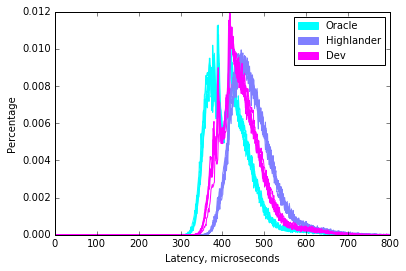

In [25]:
args = plotter.parse_args('-if ./all_data/rd/cperf1/Dev\
                               ./all_data/rd/cperf1/Highlander \
                               ./all_data/rd/cperf1/Oracle\
                               -bn Dev Highlander Oracle\
                                -rq INSERT -p -al 0 800 0 0.012')
plotter.whole_cycle(args)

#### Short summary. 

It's evident that Oracle is better than Zing on these plots, taken on cperf1. But these plots show only data behaviour before 99 percentile. On large percentiles Oracle is much wore than Zing. Also we see that Dev is better than Highlander, which is better than Granada.


Now let's compare this data using percentiles.

Dev vs Highlander on cperf1

percentile value: 50
Dev mean and std: 305.666666667, 4.42216638714
Highlander mean and std: 320.5, 2.98607881119
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------
percentile value: 90
Dev mean and std: 378.833333333, 3.89087250998
Highlander mean and std: 388.833333333, 3.02305952454
Probability of being drown from different distr.: 0.987761846874
---------------------------------------------------------------
percentile value: 99
Dev mean and std: 450.166666667, 7.94599829404
Highlander mean and std: 462.0, 3.0
Probability of being drown from different distr.: 0.987761846874
---------------------------------------------------------------
percentile value: 99.9
Dev mean and std: 558.333333333, 15.1510909032
Highlander mean and std: 580.833333333, 6.69369520934
Probability of being drown from different distr.: 0.923354867436
---------------------------------------------------------------
percentile value: 99

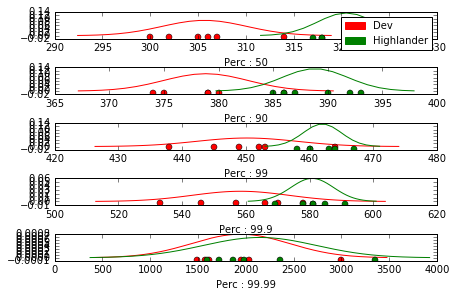

In [2]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Dev\
                               ./all_data/rd/cperf1/Highlander \
                               -bn Dev Highlander\
                                -rq READ -p')
comparer.whole_cycle(args)

The same on ISVX01

percentile value: 50
Dev mean and std: 468.0, 4.41588043316
Highlander mean and std: 489.333333333, 3.24893144827
Probability of being drown from different distr.: 0.995315196102
---------------------------------------------------------------
percentile value: 90
Dev mean and std: 587.75, 12.3970762682
Highlander mean and std: 618.166666667, 10.7147354403
Probability of being drown from different distr.: 0.970187077737
---------------------------------------------------------------
percentile value: 99
Dev mean and std: 864.5, 38.8361944583
Highlander mean and std: 944.333333333, 43.9646322501
Probability of being drown from different distr.: 0.933709891171
---------------------------------------------------------------
percentile value: 99.9
Dev mean and std: 2505.0, 245.635909427
Highlander mean and std: 2753.66666667, 364.368708255
Probability of being drown from different distr.: 0.110473966896
---------------------------------------------------------------
percentile value: 99.99


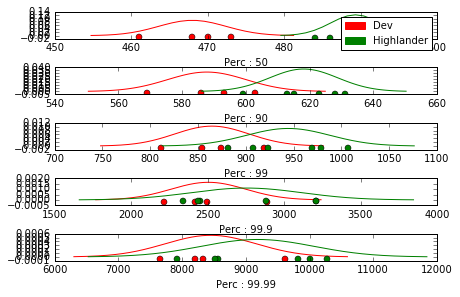

In [4]:
args = comparer.parse_args('-if ./all_data/rd/isvx01/Dev\
                               ./all_data/rd/isvx01/Highlander \
                               -bn Dev Highlander\
                                -rq READ -p')
comparer.whole_cycle(args)

Results are almoust the same on two machines. But on isvx01 we are not confident around 99.9 percentile. Lets check if it is an 'unconviniet' percentile, or it will be the same all around. To do this we will run the same test with another percentiles.

percentile value: 99.7
Dev mean and std: 1246.75, 80.7724427017
Highlander mean and std: 1401.5, 116.316737116
Probability of being drown from different distr.: 0.933709891171
---------------------------------------------------------------
percentile value: 99.9
Dev mean and std: 2505.0, 245.635909427
Highlander mean and std: 2753.66666667, 364.368708255
Probability of being drown from different distr.: 0.110473966896
---------------------------------------------------------------
percentile value: 99.95
Dev mean and std: 4045.0, 395.096190819
Highlander mean and std: 4290.33333333, 537.793537418
Probability of being drown from different distr.: 0.110473966896
---------------------------------------------------------------
percentile value: 99.97
Dev mean and std: 5174.0, 483.47492179
Highlander mean and std: 5650.66666667, 556.525730662
Probability of being drown from different distr.: 0.564689810245
---------------------------------------------------------------
percentile value: 99.

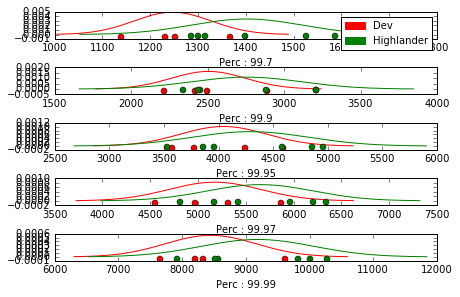

In [8]:
args = comparer.parse_args('-if ./all_data/rd/isvx01/Dev\
                               ./all_data/rd/isvx01/Highlander \
                               -bn Dev Highlander\
                                -rq READ -p\
                                -chp 99.7 99.9 99.95 99.97 99.99')
comparer.whole_cycle(args)

We can see that the problem is around 99.9 value and nowhere else. This probably means that Dev has increased density slightly before 99.9 percentile. On the other machine we can't see the same, so it may be some kind of outliying point.

Now Dev vs Oracle on cperf1

percentile value: 50.0
Dev mean and std: 305.666666667, 4.42216638714
Oracle mean and std: 282.833333333, 3.33749739908
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------
percentile value: 90.0
Dev mean and std: 378.833333333, 3.89087250998
Oracle mean and std: 367.5, 3.40342964278
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------
percentile value: 99.0
Dev mean and std: 450.166666667, 7.94599829404
Oracle mean and std: 18850.6666667, 841.759004836
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------
percentile value: 99.9
Dev mean and std: 558.333333333, 15.1510909032
Oracle mean and std: 44224.0, 835.684150861
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------


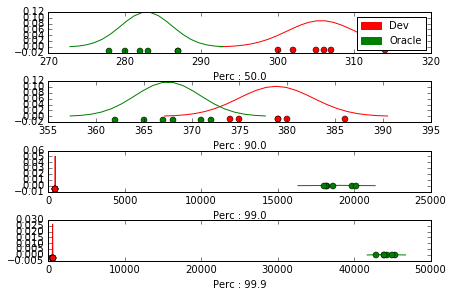

In [16]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Dev\
                               ./all_data/rd/cperf1/Oracle \
                               -bn Dev Oracle\
                                -rq READ -p\
                               -chp 50 90 99 99.9')
comparer.whole_cycle(args)

More preciece around 90's

percentile value: 90.0
Dev mean and std: 378.833333333, 3.89087250998
Oracle mean and std: 367.5, 3.40342964278
Probability of being drown from different distr.: 0.998700256015
---------------------------------------------------------------
percentile value: 93.0
Dev mean and std: 390.333333333, 4.30761599444
Oracle mean and std: 381.666666667, 3.3993463424
Probability of being drown from different distr.: 0.987761846874
---------------------------------------------------------------
percentile value: 95.0
Dev mean and std: 400.666666667, 4.64279609239
Oracle mean and std: 396.166666667, 4.17997873466
Probability of being drown from different distr.: 0.681971645938
---------------------------------------------------------------
percentile value: 97.0
Dev mean and std: 416.0, 5.50757054729
Oracle mean and std: 424.833333333, 5.20949986936
Probability of being drown from different distr.: 0.923354867436
---------------------------------------------------------------


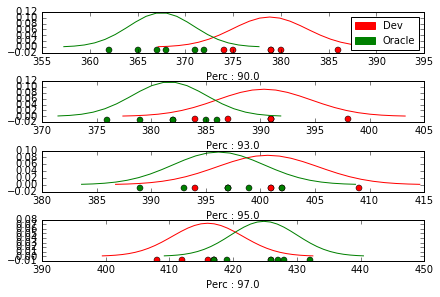

In [17]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Dev\
                               ./all_data/rd/cperf1/Oracle \
                               -bn Dev Oracle\
                                -rq READ -p\
                               -chp 90 93 95 97')
comparer.whole_cycle(args)

Behavior changes arounf 96 percentile. 

#### Comparing to itself

percentile value: 50.0
Dev mean and std: 319.5, 3.68555739792
Dev mean and std: 320.5, 1.97905701451
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 90.0
Dev mean and std: 388.333333333, 3.09120616517
Dev mean and std: 389.5, 2.43241991989
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 99.0
Dev mean and std: 461.666666667, 3.59010987142
Dev mean and std: 462.166666667, 3.93347457374
Probability of being drown from different distr.: 4.34851007416e-05
---------------------------------------------------------------
percentile value: 99.9
Dev mean and std: 581.333333333, 16.5193489245
Dev mean and std: 580.333333333, 19.1195071996
Probability of being drown from different distr.: 4.34851007416e-05
---------------------------------------------------------------


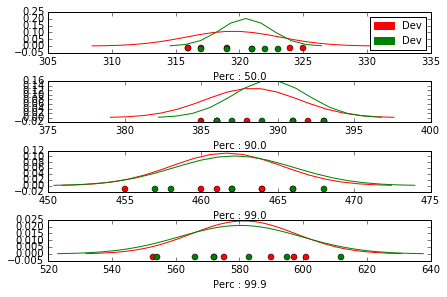

In [19]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Dev_check_1/\
                               ./all_data/rd/cperf1/Dev_check_2/ \
                               -bn Dev Dev\
                                -rq READ -p\
                               -chp 50 90 99 99.9')
comparer.whole_cycle(args)

percentile value: 50.0
Highlander mean and std: 319.5, 3.68555739792
Highlander mean and std: 320.5, 1.97905701451
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 90.0
Highlander mean and std: 388.333333333, 3.09120616517
Highlander mean and std: 389.5, 2.43241991989
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 99.0
Highlander mean and std: 461.666666667, 3.59010987142
Highlander mean and std: 462.166666667, 3.93347457374
Probability of being drown from different distr.: 4.34851007416e-05
---------------------------------------------------------------
percentile value: 99.9
Highlander mean and std: 581.333333333, 16.5193489245
Highlander mean and std: 580.333333333, 19.1195071996
Probability of being drown from different distr.: 4.34851007416e-05
------------------------------------------

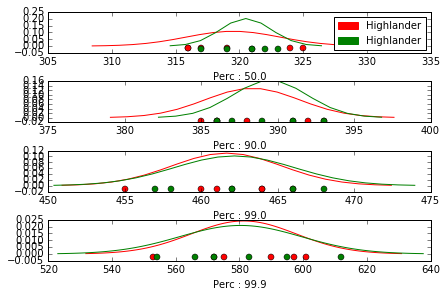

In [20]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/High_check_1/\
                               ./all_data/rd/cperf1/High_check_2/ \
                               -bn Highlander Highlander\
                                -rq READ -p\
                               -chp 50 90 99 99.9')
comparer.whole_cycle(args)

percentile value: 50.0
Oracle mean and std: 285.166666667, 3.33749739908
Oracle mean and std: 281.0, 2.38047614285
Probability of being drown from different distr.: 0.923354867436
---------------------------------------------------------------
percentile value: 90.0
Oracle mean and std: 369.833333333, 2.19215773966
Oracle mean and std: 364.833333333, 2.26691175146
Probability of being drown from different distr.: 0.923354867436
---------------------------------------------------------------
percentile value: 99.0
Oracle mean and std: 18885.3333333, 1151.61722036
Oracle mean and std: 18821.3333333, 1312.05419942
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 99.9
Oracle mean and std: 44464.0, 1728.46907214
Oracle mean and std: 44154.6666667, 1766.42866321
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------


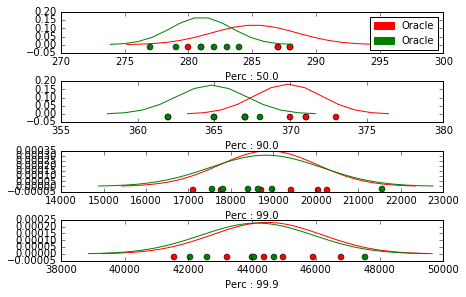

In [21]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Oracle_check_1/\
                               ./all_data/rd/cperf1/Oracle_check_2/ \
                               -bn Oracle Oracle\
                                -rq READ -p\
                               -chp 50 90 99 99.9')
comparer.whole_cycle(args)

Well, Highlander and Dev looks very close to themselves, but there is an issue with Oracle on low percentiles.

What's the reason and how to solve it? <br \>
In fact, I don't know, because random shufle of runs order will change the results. Here I'm comparing first half of runs to the second one, splited by time. 

percentile value: 50.0
Oracle mean and std: 284.166666667, 2.54405625375
Oracle mean and std: 282.0, 4.08248290464
Probability of being drown from different distr.: 0.681971645938
---------------------------------------------------------------
percentile value: 90.0
Oracle mean and std: 367.833333333, 2.47767812455
Oracle mean and std: 366.833333333, 3.97562014729
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 99.0
Oracle mean and std: 18680.0, 926.470003112
Oracle mean and std: 19026.6666667, 1459.90441087
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------
percentile value: 99.9
Oracle mean and std: 44325.3333333, 1386.18453157
Oracle mean and std: 44293.3333333, 2057.59557629
Probability of being drown from different distr.: 0.190442689383
---------------------------------------------------------------


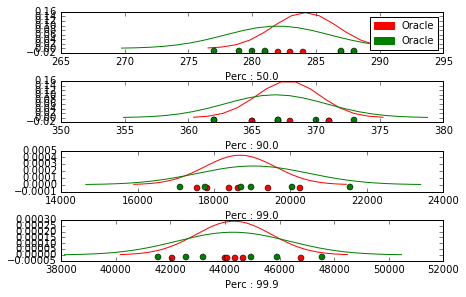

In [23]:
args = comparer.parse_args('-if ./all_data/rd/cperf1/Oracle_check_3/\
                               ./all_data/rd/cperf1/Oracle_check_4/ \
                               -bn Oracle Oracle\
                                -rq READ -p\
                               -chp 50 90 99 99.9')
comparer.whole_cycle(args)

Here is another split and the result is different. 

### Recomendations

I recommend the following:
- to compare around small percentiles you better get large amount of short runs, cause small percentiles are stable enough on almoust any run length.
- to compare large percentiles try to increase runs duration as much as possible, but in any case you have to make at least 5 runs to have some confidence.
